# **Dicoding Submission - Proyek Akhir : Image Classification Model Deployment**

**Samatha Marhaendra Putra**

Data Source: https://www.kaggle.com/datasets/alessiocorrado99/animals10

In [1]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!mkdir ~/.kaggle

In [3]:
!cp kaggle.json ~/.kaggle/

In [4]:
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d alessiocorrado99/animals10

 98% 572M/586M [00:03<00:00, 256MB/s]
100% 586M/586M [00:03<00:00, 193MB/s]


In [6]:
!pip install split-folders[full]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
!unzip /content/animals10.zip

Streaming output truncated to the last 5000 lines.
  inflating: raw-img/ragno/OIP-MVQChNQpHiMZEVMPehrvoAHaE6.jpeg  
  inflating: raw-img/ragno/OIP-MVdIFDAFpNyK_XCpwkDIWgHaFj.jpeg  
  inflating: raw-img/ragno/OIP-MYY_8k5AHqMJwTCNXfH6rwHaFj.jpeg  
  inflating: raw-img/ragno/OIP-MZEVXuoMsATG8u_UuTQ6hAHaE8.jpeg  
  inflating: raw-img/ragno/OIP-MZg0tznDRE95AMfyuutuYAHaE6.jpeg  
  inflating: raw-img/ragno/OIP-M_r9DkR2X5gP0P5-z8wPYQHaE7.jpeg  
  inflating: raw-img/ragno/OIP-M_xDUSzjlF3-w9XHCm93cgHaFF.jpeg  
  inflating: raw-img/ragno/OIP-MbI4-bMyutRX3X382IAVcQAAAA.jpeg  
  inflating: raw-img/ragno/OIP-MbMksZdD7gomsC9fd6cpKgHaHJ.jpeg  
  inflating: raw-img/ragno/OIP-Md4AMcvjaHcivJqeW06wEwHaFW.jpeg  
  inflating: raw-img/ragno/OIP-MgCgailkT5XkO1XczzQCngHaLK.jpeg  
  inflating: raw-img/ragno/OIP-MgrKq05YHGXsgj1AmYIyJQHaE8.jpeg  
  inflating: raw-img/ragno/OIP-MhRGx7d8nbnHBuqrsO00EQHaFo.jpeg  
  inflating: raw-img/ragno/OIP-MiVgMXcKGQdog2KGe7i0YQHaHh.jpeg  
  inflating: raw-img/ragno/OIP-Mis0lJf3

# **Data Preprocessing**

#### Deleting unecessary data

In [8]:
!rm -rf "/content/raw-img/cavallo"
!rm -rf "/content/raw-img/elefante"
!rm -rf "/content/raw-img/farfalla"
!rm -rf "/content/raw-img/gatto"
!rm -rf "/content/raw-img/mucca"
!rm -rf "/content/raw-img/pecora"
!rm -rf "/content/raw-img/scoiattolo"
!rm "/content/translate.py"

#### Importing required libraries

In [9]:
import os
import splitfolders
import tensorflow as tf
from keras_preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau

#### Checking the number of the images

In [10]:
count_img = (len(os.listdir('/content/raw-img/cane'))
              + len(os.listdir('/content/raw-img/gallina'))
              + len(os.listdir('/content/raw-img/ragno')))

print("Count of Image Files: %d" %count_img)

Count of Image Files: 12782


#### Data splitting

In [11]:
input_folder = "/content/raw-img"
output_folder = "splitted_dataset"

splitfolders.ratio(input_folder, output=output_folder, seed=1337, ratio=(.8, .2), group_prefix=None, move=False)

Copying files: 12782 files [00:01, 6926.14 files/s]


In [12]:
os.listdir('splitted_dataset/train')

['gallina', 'ragno', 'cane']

In [13]:
os.listdir('splitted_dataset/val')

['gallina', 'ragno', 'cane']

#### Image augmentation

In [14]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range=0.2,
                    zoom_range=0.2,
                    fill_mode='nearest')

In [15]:
train_generator = train_datagen.flow_from_directory(
        'splitted_dataset/train',
        target_size=(150, 150),
        batch_size=128,
        class_mode='categorical')

validation_generator = train_datagen.flow_from_directory(
        'splitted_dataset/val',
        target_size=(150, 150),
        batch_size=128,
        class_mode='categorical')

Found 10224 images belonging to 3 classes.
Found 2558 images belonging to 3 classes.


# **Model Development**

#### Architecting the model

In [16]:
# creating convolutional neural network (CNN) model architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [18]:
model.compile(optimizer=tf.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

#### Creating callback functions

In [19]:
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss', 
    factor=0.2,   
    patience=3, 
    min_lr=1e-6,
    verbose=2
)

In [20]:
class stopTrain(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.92 and logs.get('val_accuracy') > 0.92):
      print("\nReached accuracy < %2.2f%%, stopping training . . ." %logs.get('accuracy'))
      self.model.stop_training = True

stop_train = stopTrain()

#### Training the model

In [21]:
history = model.fit(train_generator,
                    epochs=100,
                    validation_data=validation_generator,
                    callbacks=[reduce_lr, stop_train])

Epoch 1/100
80/80 [==============================] - 90s 978ms/step - loss: 0.9507 - accuracy: 0.5417 - val_loss: 0.7724 - val_accuracy: 0.6806 - lr: 0.0010
Epoch 2/100
80/80 [==============================] - 76s 956ms/step - loss: 0.6838 - accuracy: 0.7093 - val_loss: 0.6425 - val_accuracy: 0.7369 - lr: 0.0010
Epoch 3/100
80/80 [==============================] - 75s 940ms/step - loss: 0.5545 - accuracy: 0.7737 - val_loss: 0.5195 - val_accuracy: 0.7959 - lr: 0.0010
Epoch 4/100
80/80 [==============================] - 77s 962ms/step - loss: 0.4730 - accuracy: 0.8149 - val_loss: 0.4564 - val_accuracy: 0.8233 - lr: 0.0010
Epoch 5/100
80/80 [==============================] - 77s 960ms/step - loss: 0.4201 - accuracy: 0.8391 - val_loss: 0.3704 - val_accuracy: 0.8542 - lr: 0.0010
Epoch 6/100
80/80 [==============================] - 75s 940ms/step - loss: 0.3966 - accuracy: 0.8515 - val_loss: 0.3330 - val_accuracy: 0.8706 - lr: 0.0010
Epoch 7/100
80/80 [==============================] - 76s 9

# **Plot the metrics**

In [27]:
import matplotlib.pyplot as plt

def plot_lr(history):
    learning_rate = history.history['lr']
    epochs = range(1, len(learning_rate) + 1)
    plt.rcParams["figure.figsize"] = (6,8)
    plt.plot(epochs, learning_rate)
    plt.title('Learning rate ')
    plt.xlabel('Epochs')
    plt.ylabel('Learning rate')
    plt.show()

def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_' + metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.rcParams["figure.figsize"] = (6,8)
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and validation ' + metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_" + metric, 'val_' + metric], loc="best")
    plt.show()

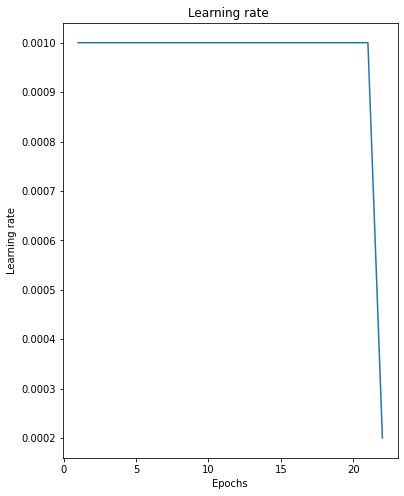

In [28]:
plot_lr(history)

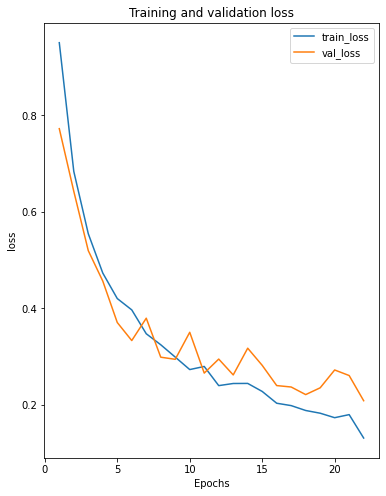

In [29]:
plot_metric(history, 'loss')

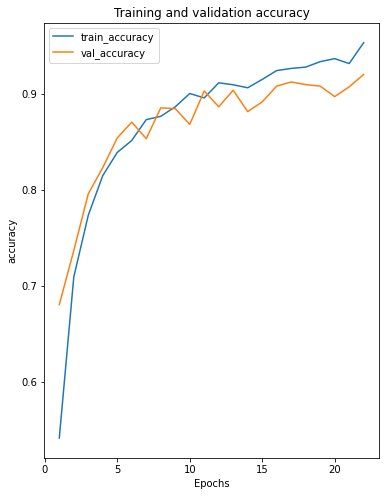

In [30]:
plot_metric(history, 'accuracy')

# **Save the model as TF-Lite format**

In [32]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

In [35]:
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)